In [16]:
from Pic16aProject import star_data
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sklearn as sklearn

from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, neighbors

  
   

In [2]:
#makes instance of star_data class using exoTrain.csv file
exoTrain = star_data(datafile = "exoTrain.csv")

In [3]:
# function outside class
#utilizes methods in star_data class

def plot_tree_scores(depths = np.arange(1, 10)):
    #makes empty plot
    fig, ax = plt.subplots(1, figsize= (12, 8))
    train_scores = []
    test_scores = []
    
    #checks accuracy score for each depth in inputted range
    for d in depths:
        exoTrain = star_data(datafile = "exoTrain.csv", d = d)
        exoTrain.fit_tree()
        train_score = exoTrain.tree_train_score()
        test_score = exoTrain.tree_test_score()
        train_scores.append(train_score)
        test_scores.append(test_score)  
    
    #plots each score
    ax.scatter(depths, train_scores, label='train score')
    ax.scatter(depths, test_scores, label='test score')
    ax.set(xlabel="depth", ylabel= 'score')
    plt.legend(fontsize=20)
    plt.show()

In [18]:
def plot_knn_scores(n_neighbors = np.arange(1, 20)):
#utilizes methods in star_data class   
    fig, ax = plt.subplots(1, figsize= (12, 8))
    n_neighbors = n_neighbors
    train_accuracy = []
    test_accuracy = []
    
    #checks accuracy score for each number of neighbors in inputted range
    for n in n_neighbors:
        exoTrain = star_data(datafile = "exoTrain.csv", n = n)
        exoTrain.fit_knn()
        knn = exoTrain.fit_knn()
        train_score = exoTrain.knn_train_score()
        test_score = exoTrain.knn_test_score()
        train_accuracy.append(train_score)
        test_accuracy.append(test_score)
    
    #plots each score
    ax.plot(n_neighbors, train_accuracy, label='train accuracy')
    ax.plot(n_neighbors, test_accuracy, label='test accuracy')
    ax.set(xlabel="n_neighbors", ylabel= 'Accuracy')
    plt.legend(fontsize=20)
    plt.show()    

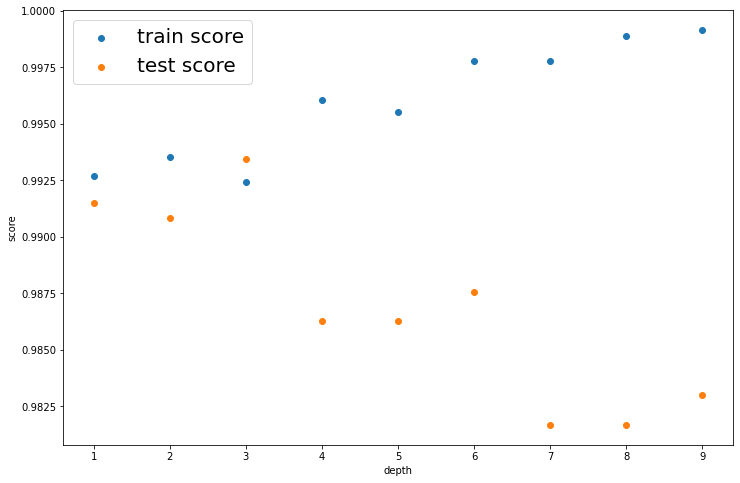

In [17]:
#finds best scores from depth 1 to 10
plot_tree_scores()

## According to the different scores, the best depth for decision tree model is 3

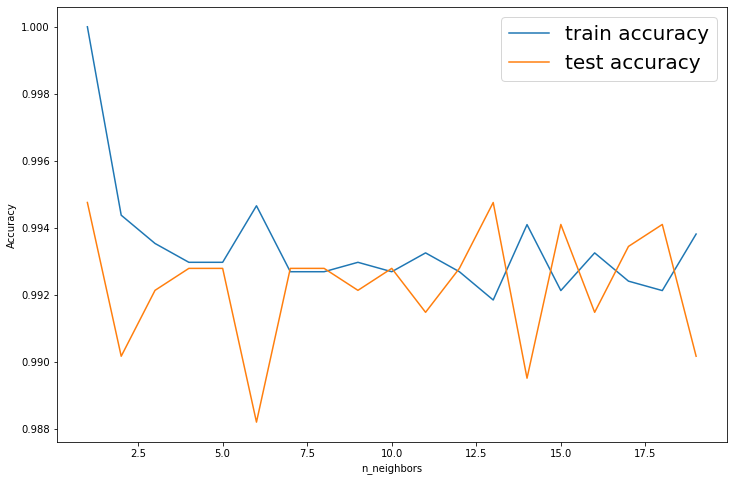

In [8]:
#finds best scores with neighbors from 1 to 20
plot_knn_scores()

## According to the graph of scores from number of nearest neighbors from 1 to 20, 13 has the best accuracy

In [19]:
#initializing d as the best depth for the decision tree and n as the best number of neighbors for KNN
exo_best = star_data(datafile = "exoTrain.csv",d = 3 , n = 13)

#reads test csv into pandas dataframe
exoTest = pd.read_csv('exoTest.csv')

#splits dataframe into predictor and outcome variables
X1 = exoTest.drop(['LABEL'], axis=1) # drop 'LABEL' column
y1 = exoTest['LABEL']

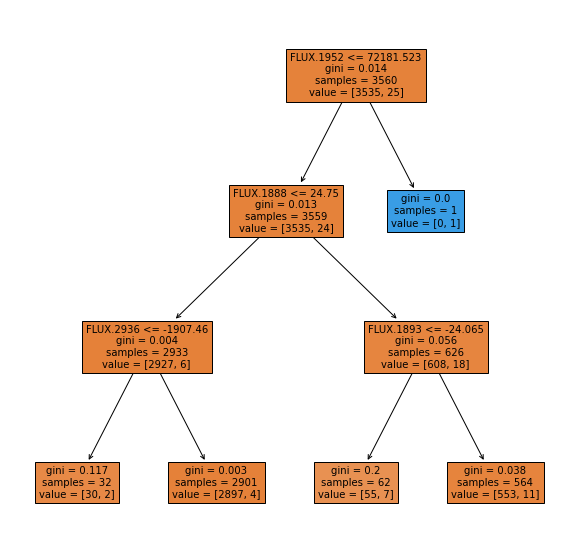

In [20]:
#calls split() and fit_tree() method within plot_tree() method
exo_best.plot_tree()

## Visualization for decision tree made using the best depth (3) and train data set

In [11]:
# creates knn model with best number of nearest neighbors
exo_best.fit_knn()

KNeighborsClassifier(n_neighbors=13)

In [12]:
exo_best.all_tree_scores()
exo_best.all_knn_scores()

Train score for tree model: 0.9926966292134831
Fake Test score for tree model: 0.9908316961362148
Train score for KNN model: 0.9932584269662922
Fake Test score for KNN model: 0.991486574983628


## Accuracy scores for exo_best model

In [13]:
#reads test csv into pandas dataframe
exoTest = pd.read_csv('exoTest.csv')

#splits dataframe into predictor and outcome variables
X1 = exoTest.drop(['LABEL'], axis=1) # drop 'LABEL' column
y1 = exoTest['LABEL']


In [21]:
#inserts predictions made by decision tree and knn algoritm into test data frame

exoTest.insert(1, "Exoplanet Prediction by Tree", exo_best.fit_tree().predict(X1))
exoTest.insert(2, "Exoplanet Prediction by Knn", exo_best.fit_knn().predict(X1))

exoTest

,LABEL,Exoplanet Prediction by Tree,Exoplanet Prediction by Knn,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,1,1,119.88,100.21,86.46,48.68,46.12,39.39,18.57,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,1,1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,1,1,844.48,817.49,770.07,675.01,605.52,499.45,440.77,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,1,1,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,1,1,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1,1,1,374.46,326.06,319.87,338.23,251.54,209.84,186.35,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,1,1,1,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,1,1,1,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,1,1,1,91.36,85.60,48.81,48.69,70.05,22.30,11.63,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60


In [15]:
#finding the accuracy score of the best decision tree against the test data
print ("Best tree model score against test data: " , exo_best.model_tree.score(X1, y1) )

#finding the accuracy score of the best knn model against the test data
print ("Best KNN model score against test data: " , exo_best.model_knn.score(X1, y1) )



Best tree model score against test data:  0.9859649122807017
Best KNN model score against test data:  0.9912280701754386
